<h1> UNITED KINGDOM ROAD ACCIDENT </h1>
<hr>
<h2> Maranan Reilh Rich P. </h2>
<h2> BSIT-3A </h2>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import folium
from folium.plugins import HeatMap

In [3]:
uk_accident = pd.read_csv('ds\\uk_road_accident.csv')

In [4]:
uk_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
uk_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
uk_accident['Accident Date'] = uk_accident['Accident Date'].str.strip()

uk_accident['Accident Date'] = uk_accident['Accident Date'].astype('str')

uk_accident['Accident Date'] = uk_accident['Accident Date'].str.replace('/', '-')

uk_accident['Accident Date'] = pd.to_datetime(uk_accident['Accident Date'], dayfirst=True, errors='coerce')

In [7]:
uk_accident['Year'] = uk_accident['Accident Date'].dt.year
uk_accident['Month'] = uk_accident['Accident Date'].dt.month
uk_accident['Day'] = uk_accident['Accident Date'].dt.day
uk_accident['DayOfWeek'] = uk_accident['Accident Date'].dt.dayofweek
uk_accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [8]:
uk_accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [9]:
uk_accident['Index'] = uk_accident['Index'].astype('str')
uk_accident['Accident_Severity'] = uk_accident['Accident_Severity'].astype('category')
uk_accident['Light_Conditions'] = uk_accident['Light_Conditions'].astype('category')
uk_accident['District Area'] = uk_accident['District Area'].astype('category')
uk_accident['Road_Surface_Conditions'] = uk_accident['Road_Surface_Conditions'].astype('category')
uk_accident['Road_Type'] = uk_accident['Road_Type'].astype('category')
uk_accident['Urban_or_Rural_Area'] = uk_accident['Urban_or_Rural_Area'].astype('category')
uk_accident['Weather_Conditions'] = uk_accident['Weather_Conditions'].astype('category')
uk_accident['Vehicle_Type'] = uk_accident['Vehicle_Type'].astype('category')
uk_accident['Day'] = uk_accident['Day'].astype('category')

In [10]:
uk_accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                              category
DayOfWeek                           int32
dtype: object

In [11]:
for a in uk_accident['District Area'].unique():
    print(a)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h1> CASTLE POINT ANALYSIS </h1>
<hr>
<h3> DISTRICT 1 </h3>

In [12]:
castlepoint_df = uk_accident[uk_accident['District Area'] == 'Castle Point']

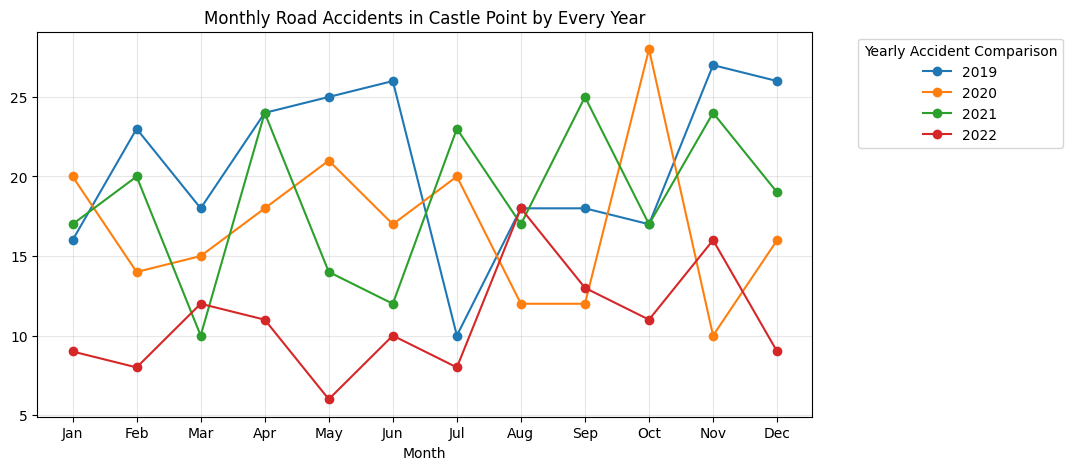

In [13]:
cp_monthlyaccident = castlepoint_df.groupby(['Year', 'Month']).size()

cp_monthlyaccident = cp_monthlyaccident.unstack(level=0)

cp_monthlyaccident.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Castle Point by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1> INSIGHT #1 </h1>

<H3> Accidents were highest in 2019, dropped significantly in 2020 (pandemic effect), increased again in 2021, but then declined in 2022, possibly due to improved road safety measures or lasting changes in travel behavior post-pandemic. </H3>

<HR>

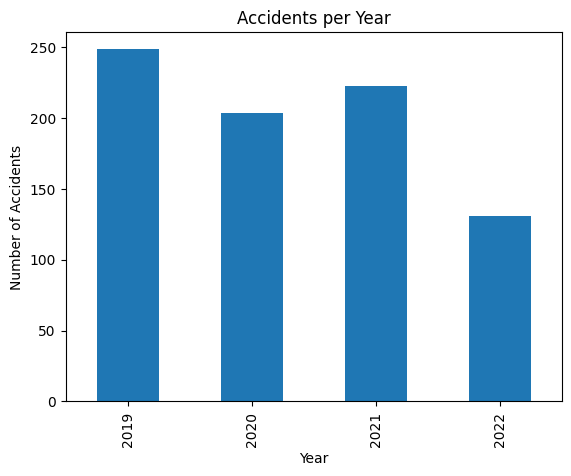

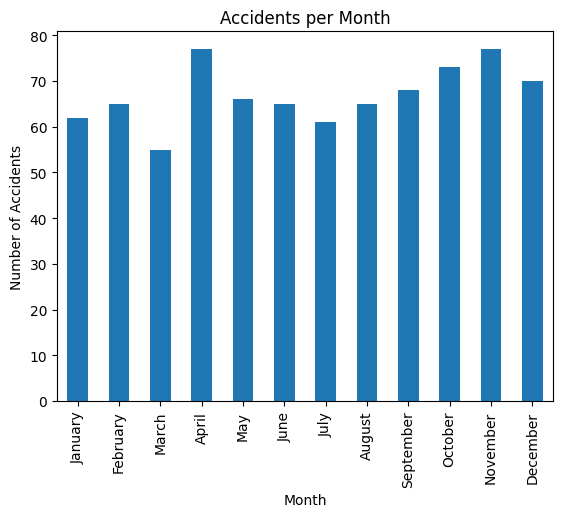

DayOfWeek
Monday        96
Tuesday      121
Wednesday    120
Thursday     124
Friday       106
Saturday     114
Sunday       123
Name: count, dtype: int64


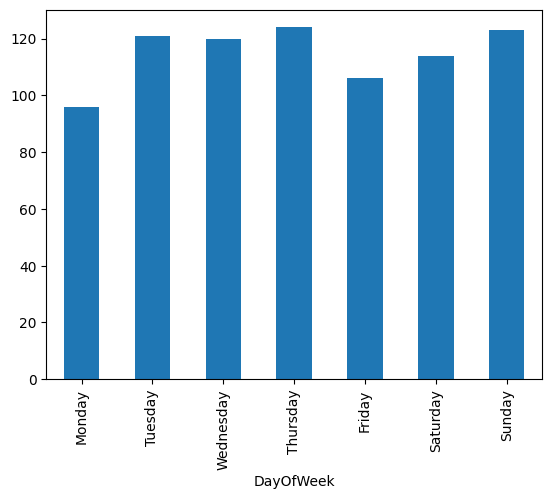

In [14]:
# Accidents per year
accidents_peryear = castlepoint_df['Year'].value_counts().sort_index()
accidents_permonth = castlepoint_df['Month'].value_counts().sort_index()
accidents_perday = castlepoint_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1> INSIGHT #2 </H1>

<H3> The data shows that road accidents were highest in 2019 and 2021, but dropped in 2020 and 2022. Accidents tend to rise toward the end of the year, especially in October and November. Most accidents happen on weekdays, while weekends record fewer incidents. </H3>

<HR>

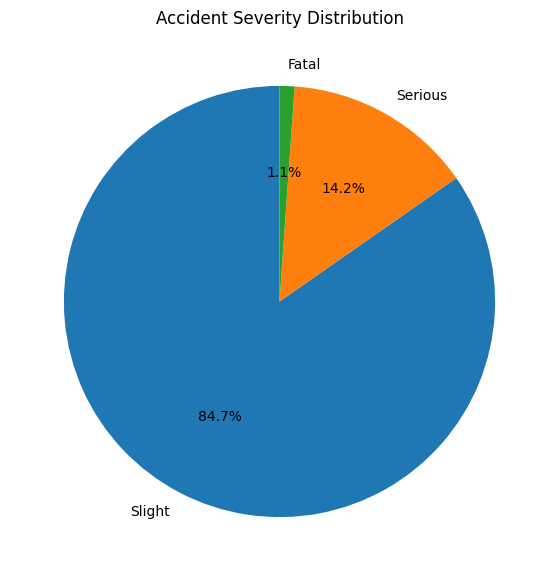

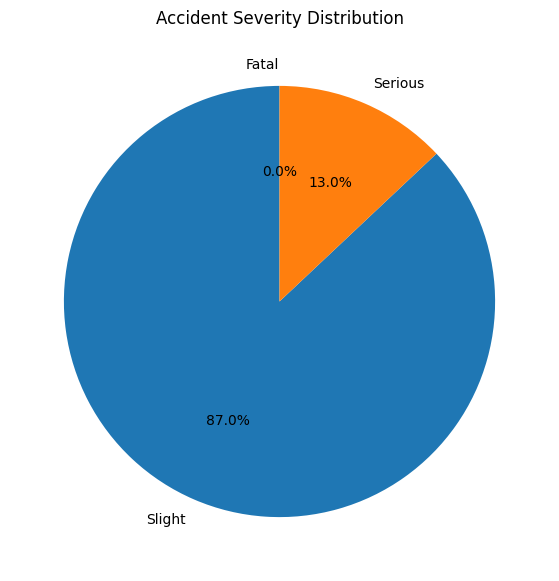

In [15]:
severity_cp  = castlepoint_df['Accident_Severity'].value_counts()

plt.pie(severity_cp,
        labels = severity_cp.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_cp = castlepoint_df[castlepoint_df['Year'] == 2022]

lsc_2022 = severity_2022_cp['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<H1> INSIGHT #3 </H1>

<H3> Most of the accidents recorded are only slight, which take up more than 80% of the cases. Around 13–14% of the accidents are serious, while fatal accidents are very rare or almost none. This shows that even though accidents happen often, most of them are only minor. </H3>

<HR>

In [16]:
CastlePoint_fatal = castlepoint_df[castlepoint_df['Accident_Severity'] == 'Fatal']

In [17]:
location = list(zip(CastlePoint_fatal['Latitude'],castlepoint_df['Longitude']))

Map = folium.Map(location=[castlepoint_df['Latitude'].mean(), castlepoint_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1> INSIGHT # 4 </h1>

<h3> I can see a clear hotspot of fatal accidents centered around Castle Point near Southend-on-Sea, especially along the main urban/arterial stretch. The colors fade quickly outside that core, so it feels like the problem is concentrated in just a few junctions or road segments rather than spread across the district. My takeaway is to dig into those specific spots by time of day, road type, and traffic volume to figure out targeted fixes like signage, speed control, or layout changes. </h3>

<HR>

In [47]:
for a in uk_accident['District Area'].unique():
    print(a)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<H1> OXFORD ANALYSIS </H1>
<HR>
<H3> DISTRICT 2 </H3>

In [19]:
oxford_df = uk_accident[uk_accident['District Area'] == 'Oxford']

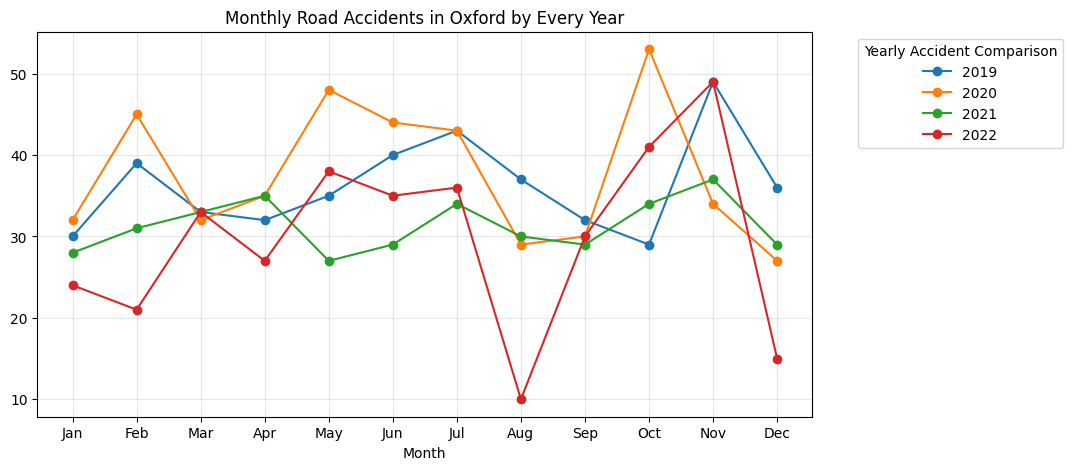

In [20]:
oxford_monthly = oxford_df.groupby(['Year', 'Month']).size()

oxford_monthly = oxford_monthly.unstack(level=0)

oxford_monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Oxford by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<H1> INSIGHT # 1 </H1>

<H3> Looking at the Oxford (District 2) analysis, I can see that accident trends vary each year. In 2020, accidents were higher in the early months like February and May, while in 2022, the numbers dropped sharply in August but spiked again in October and December. Overall, accidents tend to fluctuate across the months, but October and December appear to be the periods with the highest accident rates in most years. </H3>

<HR>

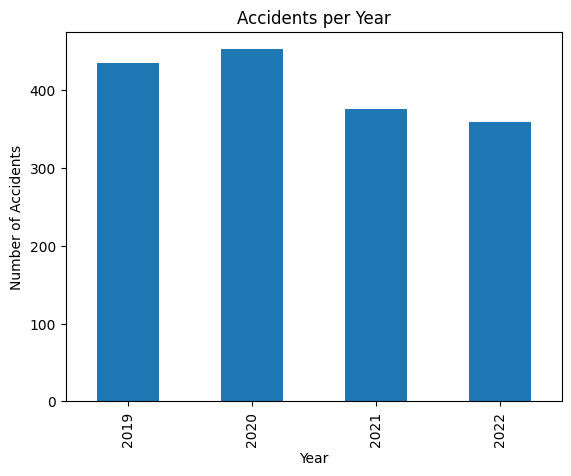

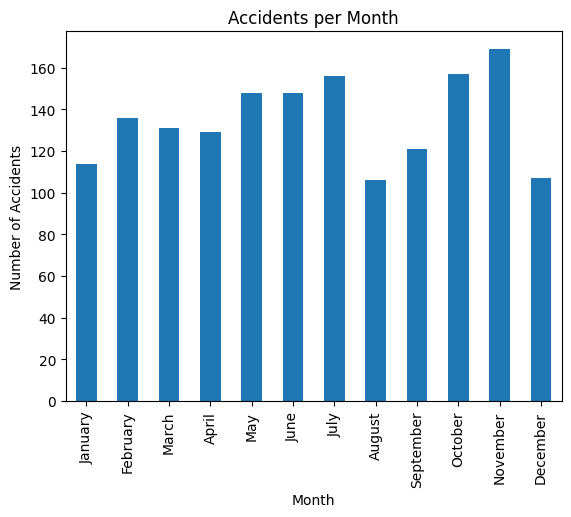

DayOfWeek
Monday       134
Tuesday      223
Wednesday    248
Thursday     267
Friday       292
Saturday     266
Sunday       192
Name: count, dtype: int64


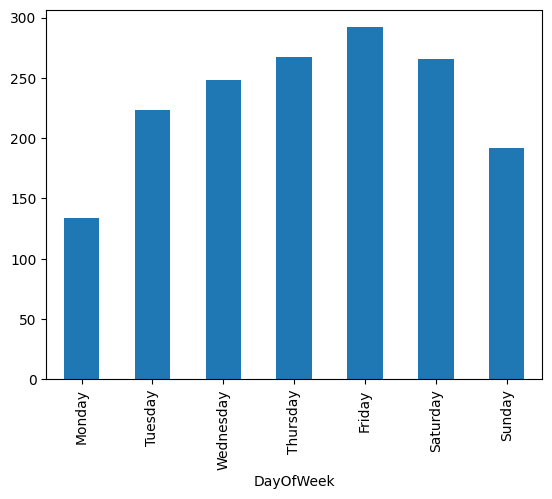

In [21]:
# Accidents per year
accidents_peryear = oxford_df['Year'].value_counts().sort_index()
accidents_permonth = oxford_df['Month'].value_counts().sort_index()
accidents_perday = oxford_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1>  INSIGHT #2</H1>

<H3> In Oxford, the number of accidents was highest in 2019 and gradually decreased over the years, with 2022 recording the lowest. Monthly data shows that accidents occur fairly consistently but peak in October and November, suggesting a seasonal rise. Looking at days of the week, accidents are more frequent on Thursdays and Fridays, while Sundays have the least, indicating that traffic volume during weekdays contributes to higher accident rates. </H3>

<HR>

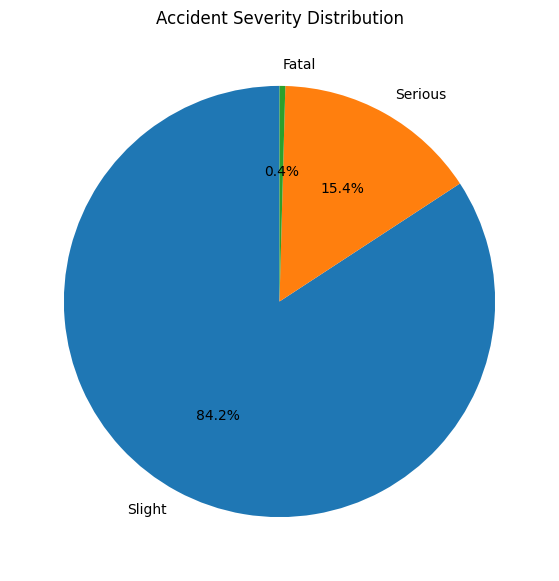

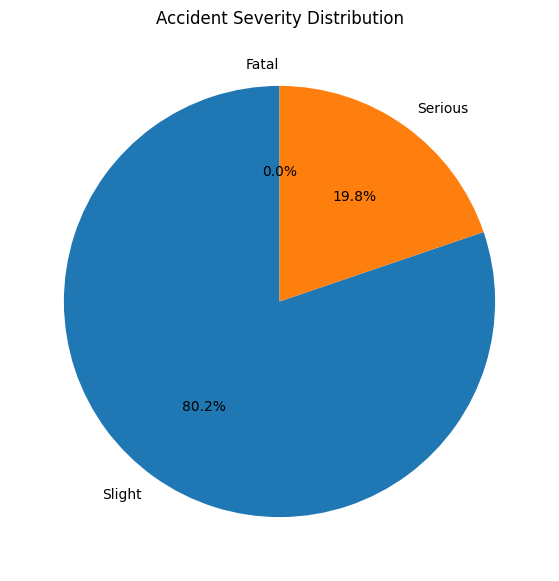

In [22]:
severity_ox  = oxford_df['Accident_Severity'].value_counts()

plt.pie(severity_ox,
        labels = severity_ox.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_ox = oxford_df[oxford_df['Year'] == 2022]

lsc_2022 = severity_2022_ox['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<H1> INSIGHT #3 </H1>

<H3> The accident severity distribution in Oxford shows that the majority of cases are classified as slight, making up more than 80% of the total. Around 13–16% of the accidents are serious, while fatal accidents are almost nonexistent. This indicates that although accidents are frequent, most of them result in only minor injuries rather than life-threatening outcomes. <H3>

<hR>

In [23]:
Oxford_fatal = oxford_df[oxford_df['Accident_Severity'] == 'Fatal']
location = list(zip(Oxford_fatal['Latitude'],oxford_df['Longitude']))

Map = folium.Map(location=[oxford_df['Latitude'].mean(), oxford_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<H1> INSIGHT # 4 </H1>

<H3> I’m seeing several small hotspots scattered along Oxford’s eastern ring road and a few busy junctions toward Cowley and Littlemore. That tells me crashes aren’t random they keep happening at the same access points and intersections. I’d zoom into those spots first to review signal timing, crossings, and speed limits for quick safety fixes. </H3>

<HR>

<H1> FIFE ANALYSIS </H1> 
<HR>
<H3> DISTRICT 3 </H3>

In [24]:
Fife_df = uk_accident[uk_accident['District Area'] == 'Fife']

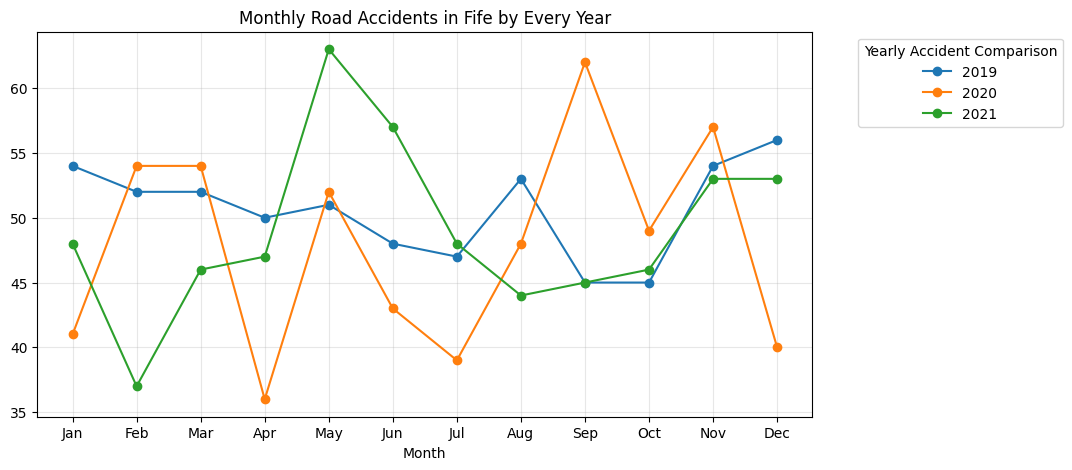

In [25]:
monthly_Fife = Fife_df.groupby(['Year', 'Month']).size()

monthly_Fife = monthly_Fife.unstack(level=0)

monthly_Fife.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Fife by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<H1> INSIGHT # 1 </H1>

<H3> In Fife, the number of accidents changes each year, with 2020 showing a spike in September and 2021 peaking around May and June. The accidents generally fluctuate across the months, with noticeable increases during the middle to later parts of the year. This shows that while accidents occur year-round, certain months tend to record higher incidents. </H3>

<HR>

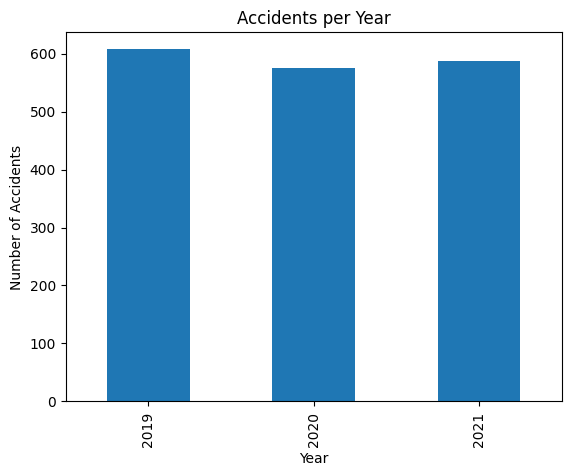

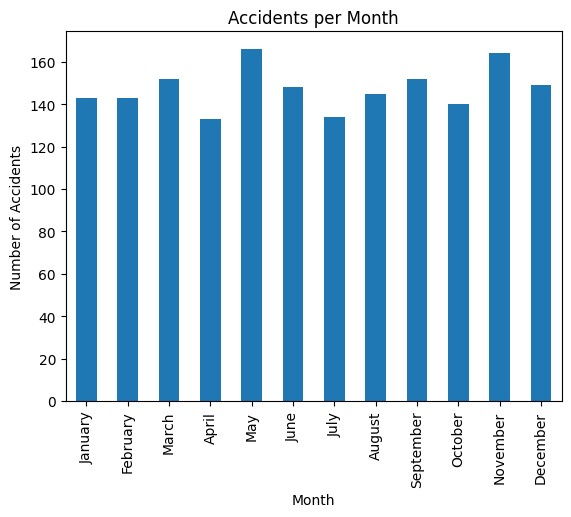

DayOfWeek
Monday       189
Tuesday      270
Wednesday    236
Thursday     263
Friday       246
Saturday     278
Sunday       287
Name: count, dtype: int64


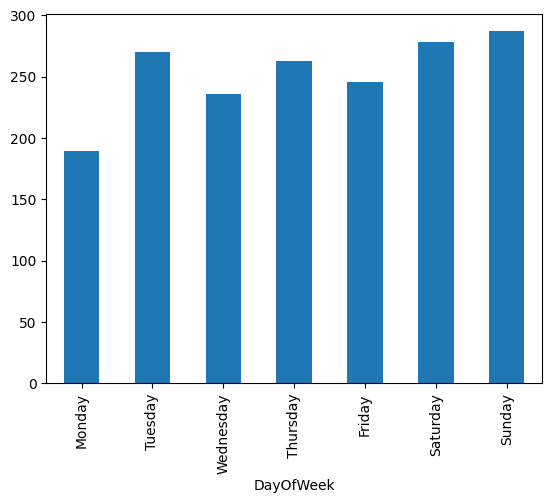

In [26]:
# Accidents per year
accidents_peryear = Fife_df['Year'].value_counts().sort_index()
accidents_permonth = Fife_df['Month'].value_counts().sort_index()
accidents_perday = Fife_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1> INSIGHT # 2 </H1>

<H3> In Fife, the yearly data shows that accidents stayed relatively high and consistent from 2019 to 2021, with only slight changes across the years. Monthly data indicates that accidents occur regularly throughout the year, with slightly higher numbers seen in the early and later months. When looking at days of the week, accidents are more frequent from Thursday to Saturday, while Monday records the lowest. </H3>

<HR>

In [27]:
Fife_fatal = Fife_df[Fife_df['Accident_Severity'] == 'Fatal']
location = list(zip(Fife_fatal['Latitude'],Fife_df['Longitude']))

Map = folium.Map(location=[Fife_df['Latitude'].mean(), Fife_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1> INSIGHT # 3 </h1>

<h3> The heatmap for Fife shows that fatal accidents are spread across different parts of the district but are mostly concentrated along the main roads and urban areas. Several clusters can be seen around towns and busy routes, while fewer incidents appear in rural areas. This suggests that traffic-heavy zones and intersections are the most prone to severe accidents. </h3>

<HR>

<H1> POOLE ANALYSIS </H1>
<HR> 
<H3> DISTRICT 4 </H3>

In [28]:
Poole_df = uk_accident[uk_accident['District Area'] == 'Poole']

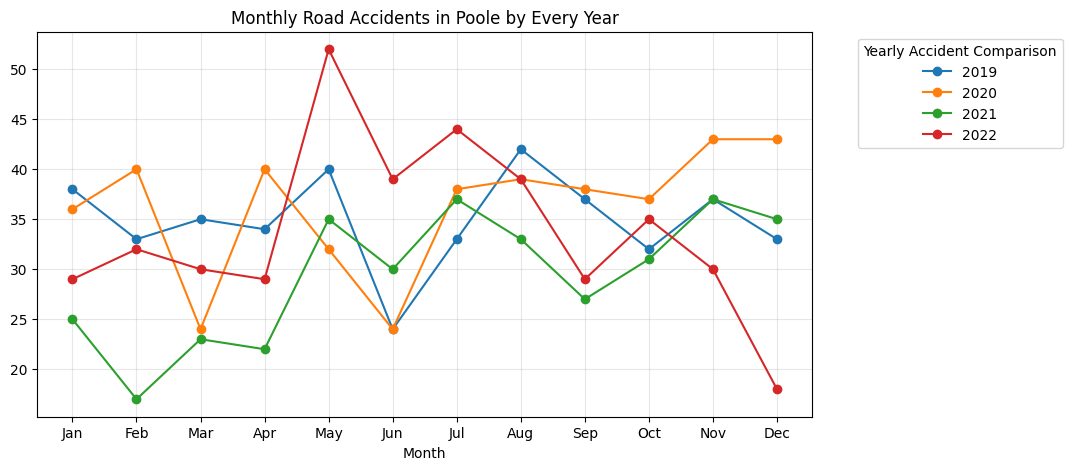

In [29]:
monthly_Poole = Poole_df.groupby(['Year', 'Month']).size()

monthly_Poole = monthly_Poole.unstack(level=0)

monthly_Poole.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Poole by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1> INSIGHT # 1 </h1> 

<h3> In Poole, the accident trends show noticeable fluctuations across the years. The year 2022 recorded higher accident numbers compared to the previous years, with a peak around May and steady incidents through the later months. Overall, accidents occur throughout the year, but some months such as May and June tend to have higher spikes.</h3>

<HR>

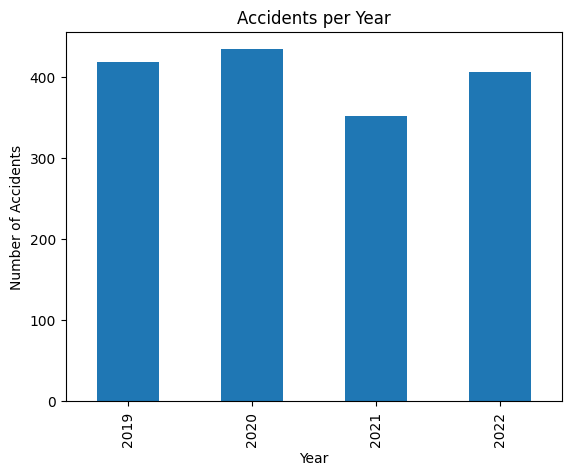

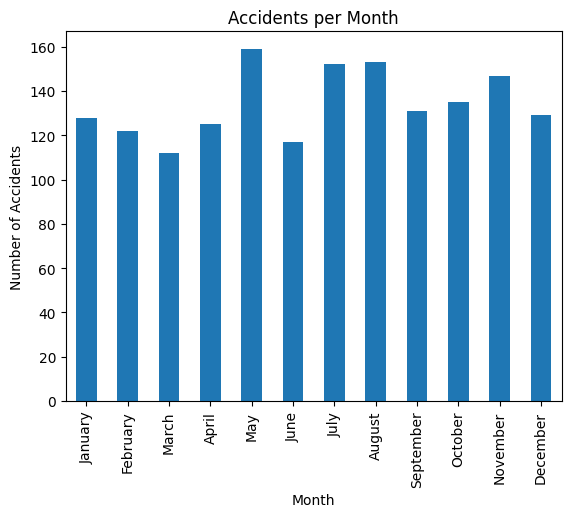

DayOfWeek
Monday       161
Tuesday      210
Wednesday    261
Thursday     248
Friday       269
Saturday     252
Sunday       209
Name: count, dtype: int64


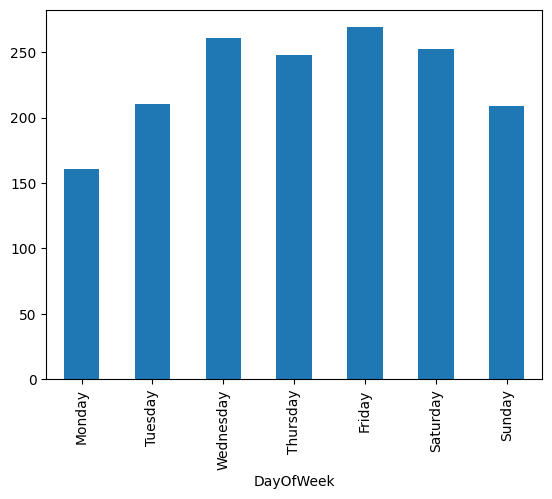

In [30]:
# Accidents per year
accidents_peryear = Poole_df['Year'].value_counts().sort_index()
accidents_permonth = Poole_df['Month'].value_counts().sort_index()
accidents_perday = Poole_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1> INSIGHT # 2 </H1> 

<H3> In Poole, the yearly data shows that accidents stayed relatively high across all years, with 2019 recording the most and 2021 showing a slight dip. Monthly results reveal that accidents are more frequent during the middle and later months of the year, particularly from July to October. When looking at days of the week, accidents are highest from Wednesday to Friday, while Sunday has the fewest recorded incidents. </H3>

<HR>

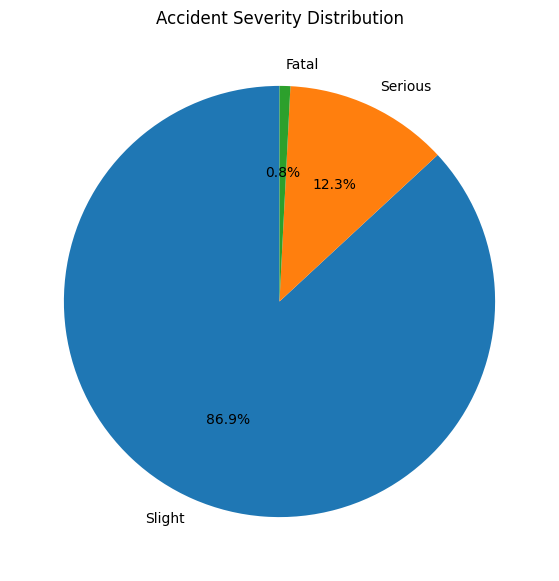

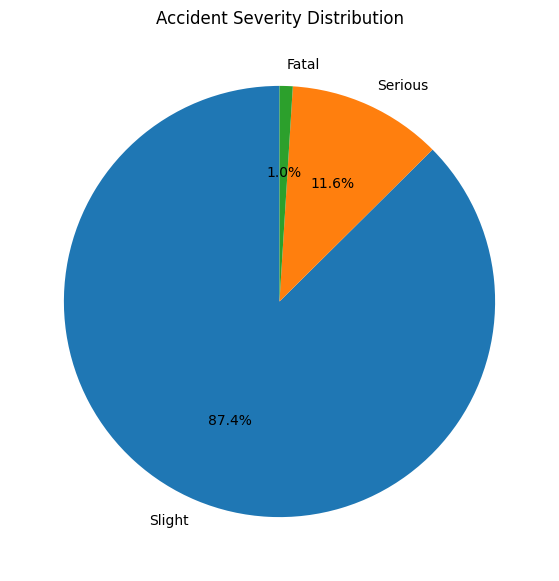

In [31]:
severity_po  = Poole_df['Accident_Severity'].value_counts()

plt.pie(severity_po,
        labels = severity_po.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_po = Poole_df[Poole_df['Year'] == 2022]

lsc_2022 = severity_2022_po['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<H1> INSIGHT # 3 </H1>

<H3> In Poole, most of the accidents are categorized as slight, making up nearly 87% of the total cases. About 11–12% of the accidents are considered serious, while less than 1% are fatal. This shows that although accidents are frequent in the area, the majority result only in minor injuries. </H3>

<HR>

In [32]:
Poole_fatal = Poole_df[Poole_df['Accident_Severity'] == 'Fatal']
location = list(zip(Poole_fatal['Latitude'],Fife_df['Longitude']))

Map = folium.Map(location=[Poole_df['Latitude'].mean(), Poole_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<H1> INSIGHT # 4 </H1>

<H3> The heatmap for Poole shows that fatal accidents are mostly concentrated along the main road network, with the strongest cluster appearing near Honiton. Smaller clusters are spread across nearby towns and highways, while rural areas show fewer incidents. This suggests that high-traffic routes are the most prone to severe accidents in the district. </H3>

<HR>

<H1> ARUN ANALAYSIS  </H1> 
<HR> 
<H3>  DISTRICT 5 </H3> 

In [33]:
Arun_df = uk_accident[uk_accident['District Area'] == 'Arun']

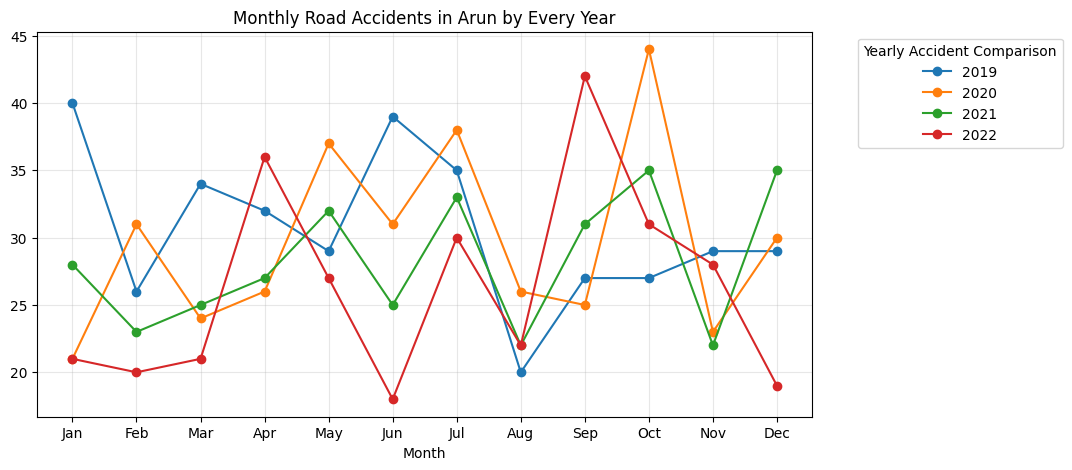

In [34]:
monthly_Arun = Arun_df.groupby(['Year', 'Month']).size()

monthly_Arun = monthly_Arun.unstack(level=0)

monthly_Arun.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Arun by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<H1> INSIGHT # 1 </H1>

<H3> In Arun, accident trends vary across the years, with 2020 and 2022 showing more noticeable spikes compared to other years. The year 2020 had higher accident numbers around May and October, while 2022 recorded sharp increases in August and September. Overall, the data suggests that accidents occur year-round, but certain months consistently experience higher peaks. </H3>

<HR>

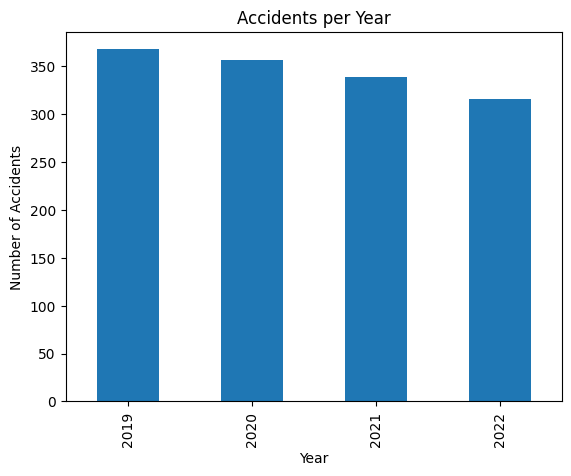

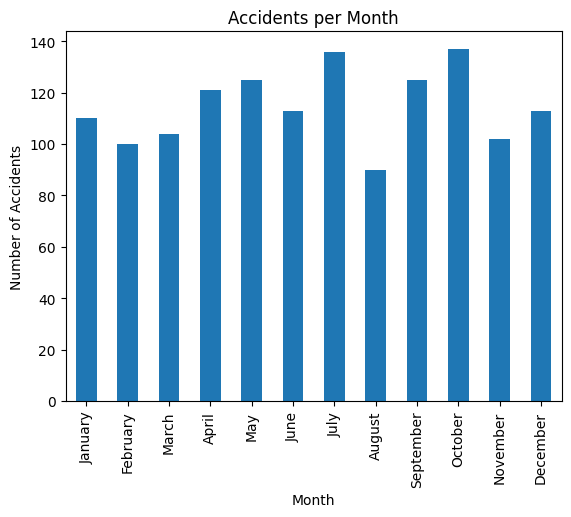

DayOfWeek
Monday       162
Tuesday      201
Wednesday    225
Thursday     213
Friday       179
Saturday     228
Sunday       168
Name: count, dtype: int64


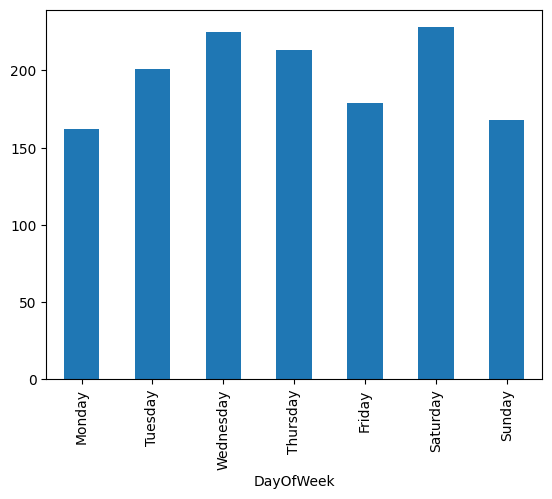

In [35]:
# Accidents per year
accidents_peryear = Arun_df['Year'].value_counts().sort_index()
accidents_permonth = Arun_df['Month'].value_counts().sort_index()
accidents_perday = Arun_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1> INSIGHT # 3 </H1>

<H3> In Arun, the yearly data shows that accidents were highest in 2019 and gradually declined in the following years, with 2022 recording the lowest. Monthly accidents are fairly steady but tend to rise around March to June and again in October to November. Looking at the days of the week, accidents occur more often from Tuesday to Friday, while Sundays have the fewest cases. </H3>

<HR>

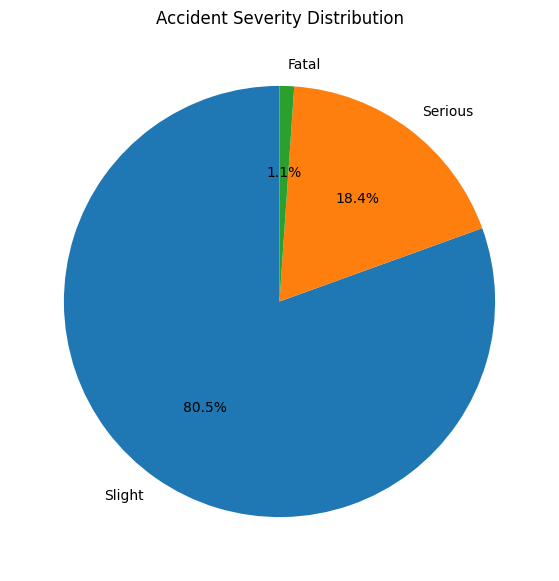

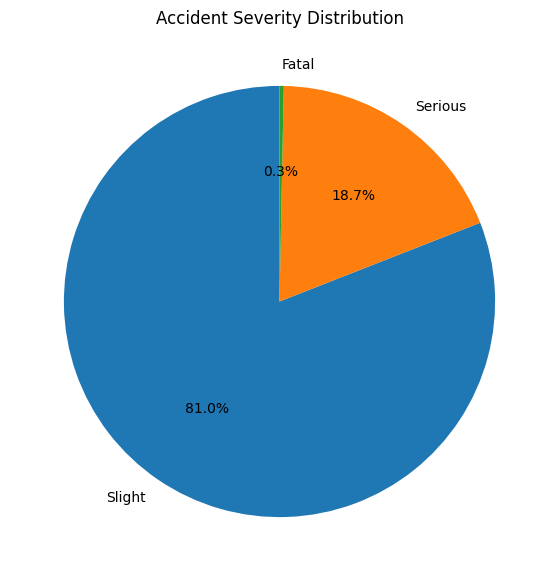

In [36]:
severity_ar  = Arun_df['Accident_Severity'].value_counts()

plt.pie(severity_ar,
        labels = severity_ar.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_ar = Arun_df[Arun_df['Year'] == 2022]

lsc_2022 = severity_2022_ar['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<H1> INSIGHT # 3 </H1> 

<H3> In Arun, most of the accidents are classified as slight, making up about 80–81% of the total cases. Around 18% of the accidents are considered serious, while less than 1% are fatal. This means that while accidents happen often in the area, the majority only result in minor injuries. </H3>

<HR>

In [37]:
Arun_fatal = Arun_df[Arun_df['Accident_Severity'] == 'Fatal']
location = list(zip(Arun_fatal['Latitude'],Fife_df['Longitude']))

Map = folium.Map(location=[Arun_df['Latitude'].mean(), Arun_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<H1> INSIGHT # 4 </H1> 

<H3> The heatmap for Arun shows that fatal accidents are mainly concentrated along key road networks, with stronger clusters appearing near towns and busy routes. Smaller hotspots are spread out across the district, while rural areas record fewer cases. This indicates that areas with higher traffic flow are more prone to severe accidents. </H3>

<H1> BURY ANALYSIS </H1> 
<HR>
<H3> DISTRICT 6  </H3>

In [39]:
York_df = uk_accident[uk_accident['District Area'] == 'York']

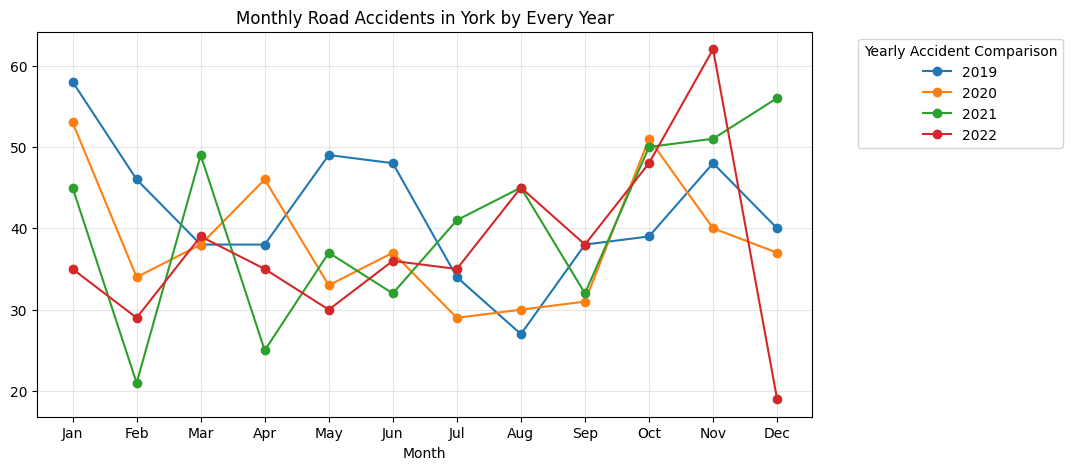

In [42]:
monthly_York = York_df.groupby(['Year', 'Month']).size()

monthly_York = monthly_York.unstack(level=0)

monthly_York.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in York by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1> INSIGHT # 1 </h1> 

<h3>Looking at York’s monthly trends, accidents usually dip around February–March and climb again from late summer into autumn peaking around September–November. 2020 stands out with a sharp drop early in the year likely tied to lockdowns before rising later.

<HR>

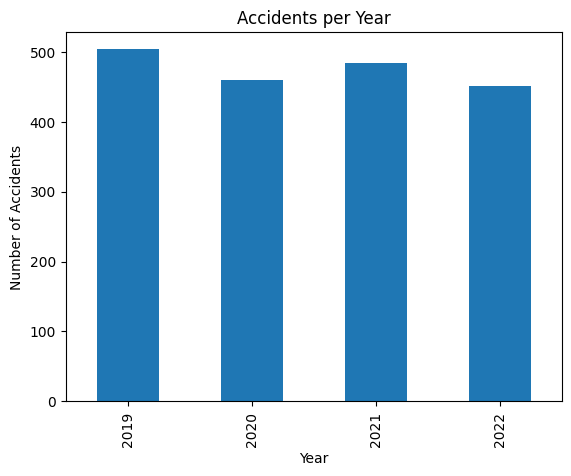

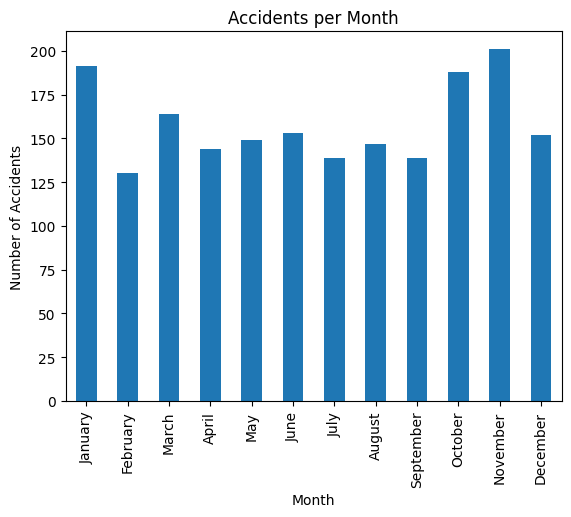

DayOfWeek
Monday       168
Tuesday      268
Wednesday    303
Thursday     277
Friday       285
Saturday     316
Sunday       280
Name: count, dtype: int64


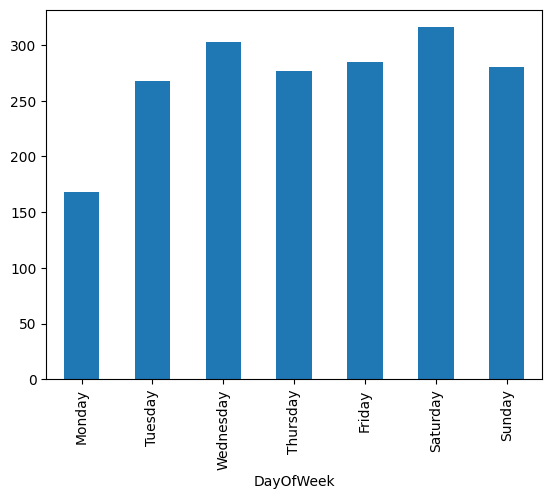

In [41]:
# Accidents per year
accidents_peryear = York_df['Year'].value_counts().sort_index()
accidents_permonth = York_df['Month'].value_counts().sort_index()
accidents_perday = York_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_peryear.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_permonth.index = accidents_permonth.index.map(month_names)


accidents_permonth.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_perday.index = accidents_perday.index.map(day_names)
accidents_perday.plot(kind='bar')
print(accidents_perday)

<H1> INSIGHT # 2 </H1> 

<H3> From these charts, I see the yearly accident totals staying fairly steady, with a small uptick by 2021. Monthly counts rise toward late year October and November look busier while early months are a bit lighter. By weekday, Saturday has the most incidents and Monday is the calmest, which matches heavier weekend travel. </H3>

<HR>

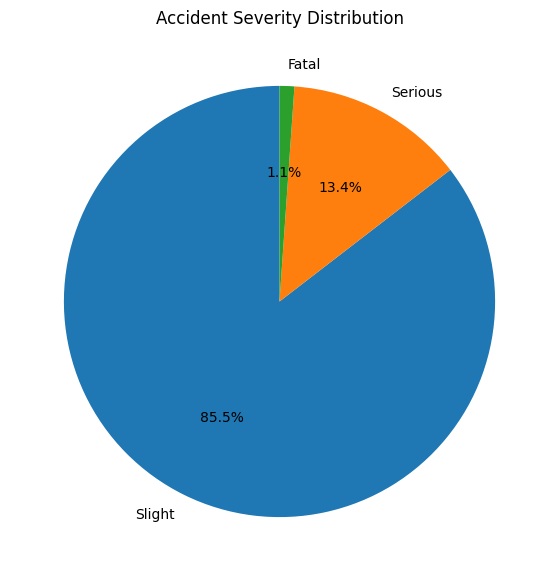

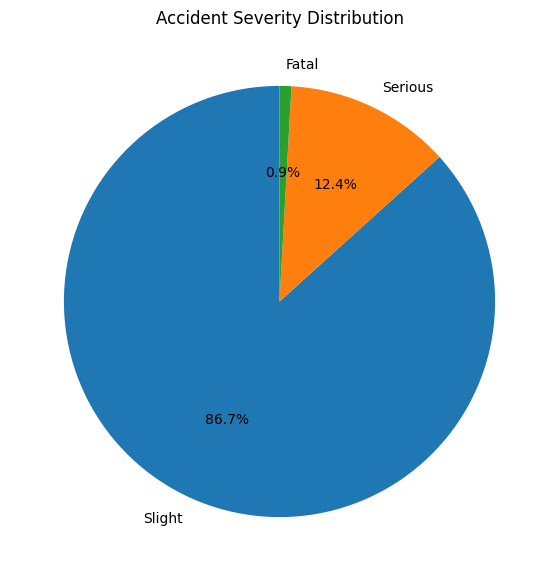

In [44]:
severity_yk  = York_df['Accident_Severity'].value_counts()

plt.pie(severity_yk,
        labels = severity_yk.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_yk = York_df[York_df['Year'] == 2022]

lsc_2022 = severity_2022_yk['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<H1> INSIGHT # 3 </H1> 

<H3> Most of the crashes are “slight” (about 86%), with “serious” around 12–13% and “fatal” under 1%. The two charts look almost the same, so that pattern seems consistent across areas. My takeaway: keep broad measures to reduce the many minor collisions, while zeroing in on the few spots that lead to serious or fatal cases. </H3>

<HR>

In [46]:
York_fatal = York_df[York_df['Accident_Severity'] == 'Fatal']
location = list(zip(York_fatal['Latitude'],York_df['Longitude']))

Map = folium.Map(location=[York_df['Latitude'].mean(), York_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<H1> INSIGHT # 4 </H1>

<H3> I’m seeing multiple fatal accident hotspots circling York, especially along the main ring roads and the busy approaches into the city. The brightest spots line up with big junctions and river crossings, which makes sense for heavy traffic and lane merging. I’d focus checks there first signal timing, speed limits, and safer crossings could make a quick difference.  </H3>

<HR>